# Experimental design

_Alex I. Malz (LINCC@CMU)_

_LSSTC DSFP #16_

I initially started a version of this problem set based on a data challenge I prepared for [Quarks to Cosmos with AI](https://events.mcs.cmu.edu/qtc2021/), which provides all the pieces you need to run an interesting experiment with photo-$z$ posterior PDF estimation models by a variety of metrics.
However, that seems overly specific for the DSFP -- the goal is for you to learn to think adversarially in your own research, not in mine! -- so this one is more generalizable.

## Objective

The goal of this problem set is for you to learn to identify and circumvent flaws in an experiment.
To us as astronomers, an experiment may constitute the way we compare analysis methods or models or the impact of systematic imperfections in data or priors.
The way we decide whether a procedure we came up with is sufficient for a task or better than some alternative is conditioned on our choice of metric.

## Problem 1

Here are four sets of two-dimensional data.
You can imagine that they're the predictions of four models for estimating the relationship between variables $x$ and $y$ if you like (e.g. galaxy cluster concentration as a function of dark matter halo mass), or four observations that may or may not have come from a common process (e.g. folded time-series of variable stars).
In this problem, you don't know the true values and can't conduct a controlled experiment, so we'll try to compare them using summary statistics we might actually apply to comparing the results of several estimation methods.

In [71]:
import numpy as np
np.random.seed(12)

a = np.random.randint(0,5, size=(10)) # or (512,3)
b = np.random.randint(0,5, size=(10)) # or (1024,3)

diff = a[np.newaxis,:]-b[:,np.newaxis]

dist = np.sum(diff**2,axis=-1)

In [78]:
a[np.newaxis,:]

array([[3, 3, 1, 2, 3, 3, 4, 0, 1, 4]])

In [77]:
b[:,np.newaxis]

array([[1],
       [2],
       [3],
       [2],
       [0],
       [0],
       [4],
       [2],
       [1],
       [3]])

In [74]:
diff[1,:]

array([ 1,  1, -1,  0,  1,  1,  2, -2, -1,  2])

In [75]:
diff

array([[ 2,  2,  0,  1,  2,  2,  3, -1,  0,  3],
       [ 1,  1, -1,  0,  1,  1,  2, -2, -1,  2],
       [ 0,  0, -2, -1,  0,  0,  1, -3, -2,  1],
       [ 1,  1, -1,  0,  1,  1,  2, -2, -1,  2],
       [ 3,  3,  1,  2,  3,  3,  4,  0,  1,  4],
       [ 3,  3,  1,  2,  3,  3,  4,  0,  1,  4],
       [-1, -1, -3, -2, -1, -1,  0, -4, -3,  0],
       [ 1,  1, -1,  0,  1,  1,  2, -2, -1,  2],
       [ 2,  2,  0,  1,  2,  2,  3, -1,  0,  3],
       [ 0,  0, -2, -1,  0,  0,  1, -3, -2,  1]])

In [76]:
dist

array([36, 18, 20, 18, 74, 74, 42, 18, 36, 20])

In [14]:
x1 = [10, 8, 13, 9, 11, 1a4, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

x2 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]

x3 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]

x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

### 1a

The simplest summary statistic is the first moment, a.k.a. the mean, $\mu_{z} = \frac{1}{N}\sum_{i=1}^{N}z_{n}$.
Write a function to compute the mean of a one-dimensional list.
_Hint: Use `scipy.stats.moment()` if you want a shortcut._
Compute the mean of $x$ and the mean of $y$ for each data set.
Interpret the results.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

In [16]:
X = np.array((x1, x2, x3, x3))
Y = np.array((y1, y2, y3, y3))

In [19]:
X_mean = np.mean(X, axis = 1)
Y_mean = np.mean(Y, axis = 1)
print(X_mean, Y_mean)

[9. 9. 9. 9.] [7.50090909 7.50090909 7.5        7.5       ]


All xs have the samen mean and all ys almost have the same mean too

### 1b

The next simplest summary statistic is the second moment, a.k.a. the variance, $\sigma_{z}^{2} = \frac{1}{N-1}\sum_{i=1}^{N}(z_{n} - \mu_{z})^{2}$.
Write a function to compute the variance of a one-dimensional list.
_Hint: Use `scipy.stats.moment()` if you want a shortcut._
Compute the variance of $x$ and the variance of $y$ for each data set.
Interpret the results.

In [37]:
X_var = np.var(X, axis = 1)
Y_var = np.var(Y, axis = 1)
print(X_var, Y_var)

[10. 10. 10. 10.] [3.75206281 3.75239008 3.74783636 3.74783636]


### 1c

Judging by the first two moments, we need something a little more sophisticated to quantitatively distinguish these data sets.
Let's make use of both $x$ and $y$ together.
Pearson's correlation coefficient $r = \frac{\sum_{i=1}^{N}(x_{i}-\mu_{x})(y_{i}-\mu_{y})}{\sqrt{\sum_{i=1}^{N}(x_{i}-\mu_{x})^{2}\sum_{i=1}^{N}(y_{i}-\mu_{y})^{2}}}$ is a measure of the degree to which variables $x$ and $y$ are correlated with one another.
Write a function to compute the correlation coefficient of a two-dimensional data set.
_Hint: Use `scipy.stats.pearsonr()` if you want a shortcut._
Compute the $r$ for each data set.
Interpret the results.

In [61]:
for i in range(4):
    print(scipy.stats.pearsonr(X[i], Y[i]))
# Pearson product-moment correlation coefficent., The p-value associated with the chosen alternative.

(0.8164205163448397, 0.0021696288730788035)
(0.8162365060002427, 0.0021788162369108027)
(0.8162867394895981, 0.0021763052792280304)
(0.8162867394895981, 0.0021763052792280304)


### 1d

They sure do seem to all be the same, yet the numbers in the lists are different!
Let's try fitting a simple model to them.
Recycle your code from earlier in the week to fit a line to data and apply it to these four data sets.
_If you didn't get that far in a notebook, you can use `scipy.stats.linregress`._
Interpret the resulting slope and intercept values _(and coefficient of determination, p-value, and standard error, if you used the canned fitting function._

In [115]:
result = list()
for i in range(4):
    result.append(scipy.stats.linregress(X[i], Y[i]))
    print("x{}`, y{}: intercept = {:.7f}, slope = {:.7f}".format(i+1, i+1, result[i].intercept, result[i].slope))

x1, y1: intercept = 3.0000909, slope = 0.5000909
x2, y2: intercept = 3.0009091, slope = 0.5000000
x3, y3: intercept = 3.0024545, slope = 0.4997273
x4, y4: intercept = 3.0024545, slope = 0.4997273


In [117]:
result[0]

LinregressResult(slope=0.5000909090909091, intercept=3.0000909090909103, rvalue=0.8164205163448399, pvalue=0.00216962887307879, stderr=0.11790550059563408)

### 1e

Finally, plot the four data sets, along with the line.
Interpret the results.

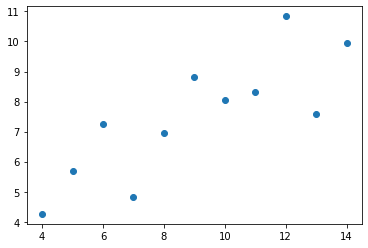

In [99]:
plt.scatter(X[0], Y[0])

In [97]:
X[0]

array([10,  8, 13,  9, 11, 14,  6,  4, 12,  7,  5])

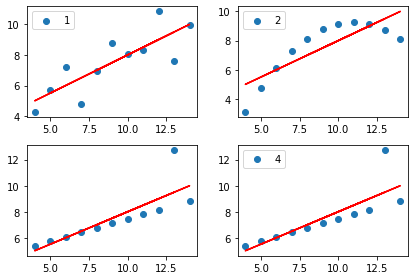

In [121]:
fig, ax = plt.subplots(2,2)

ax[0,0].scatter(X[0], Y[0], label = "1")
ax[0,0].legend()
ax[0,0].plot(X[0], result[i].intercept + result[i].slope*X[0], c = "r")
ax[0,1].scatter(X[1], Y[1], label = "2")
ax[0,1].legend()
ax[0,1].plot(X[1], result[i].intercept + result[i].slope*X[1], c = "r")
ax[1,0].scatter(X[1], Y[2], label = "3")
ax[1,0].plot(X[2], result[i].intercept + result[i].slope*X[2], c = "r")
ax[1,1].scatter(X[1], Y[3], label = "4")
ax[1,1].legend()
ax[1,1].plot(X[3], result[i].intercept + result[i].slope*X[3], c = "r")

plt.tight_layout()

### 1f

If you had to distinguish these data sets quantitatively, what metric(s) would you use?
Implement at least one and show that the data sets don't have the same value(s) by your metric(s).
Or, show that other metrics you can think of also can't distinguish them.

_Hint: Start by thinking of a way to distinguish just one from the others._
_As a challenge problem, then come up with another set of $(x, y)$ that will be degenerate by another metric._

In [125]:
np.max(Y, axis=1), np.min(Y, axis=1)

(array([10.84,  9.26, 12.74, 12.74]), array([4.26, 3.1 , 5.39, 5.39]))

Highlight for spoiler and credit.

<font color='white'>
By the way, Problem 1 is known as Anscombe's quartet and was devised to show statisticians the value of visual inspection over total reliance on quantitative metrics.
The solutions can be found in [this nifty blog post](https://datasciencesphere.com/visualization/visualizing-anscombe-quartet-using-python/).
</font>

## Problem 2

Let's try a more complicated version of this.
Download some other data sets [here](https://www.autodesk.com/content/dam/autodesk/www/autodesk-reasearch/Publications/pdf/SameStatsCode.zip).
Let's inspect them first.

In [8]:
!pwd

/home/taceroc/LSSTC_DSFP/LSSTC-DSFP-Sessions/Sessions/Session16/Day4


In [13]:
import pandas as pd

data = pd.read_csv('generated_datasets/DatasaurusDozen.tsv', sep='\t')
print(data.columns)

print(len(data['dataset'].unique()))

Index(['dataset', 'x', 'y'], dtype='object')
13


In [20]:
data[['dataset','x', 'y']]

,dataset,x,y
0,dino,55.384600,97.179500
1,dino,51.538500,96.025600
2,dino,46.153800,94.487200
3,dino,42.820500,91.410300
4,dino,40.769200,88.333300
...,...,...,...
1841,wide_lines,33.674442,26.090490
1842,wide_lines,75.627255,37.128752
1843,wide_lines,40.610125,89.136240
1844,wide_lines,39.114366,96.481751


### 2a

We can separate them out and calculate some summary statistics:
- How many points are in each?
- What is the mean?
- Variance?
- Standard deviation?
- Correlation coefficient?
- Covariance $\sum_{i=1}^{N}(x_{i}-\mu_{x})(y_{i}-\mu_{y})$?

In [ ]:
datasets_grouped = data.groupby('dataset')
print(datasets_grouped.agg(['count', 'mean', 'var', 'std']))
print(data.groupby('dataset')[['x','y']].corr().iloc[0::2,-1])
print(data.groupby('dataset').cov())

### 2b

Let's try fitting a line again to check the slopes and intercepts.

### 2c

Now try plotting them, including the line.

### 2d

Again, implement a metric that can distinguish between them, and then try to think of another data set that will be indistinguishable from one of the data sets by that metric.

Highlight for spoiler and credit.

<font color='white'>
Problem 2 uses the Datasaurus Dozen, a modern reenvisioning of Anscombe's quartet.
The solutions can be found in [yet another nifty blog post](https://datasciencesphere.com/visualization/datasaurus-dozen-visualization-using-python/).
</font>

## Problem 3

Now that you've seen how metrics can be fooled by pathological data, I want you to apply this kind of critical thinking to your research!
Talk with your neighbors to take apart a problem you (or they) are working on that involves comparing methods, models, or data.

### 3a

Articulate the metric(s) being used to make a decision.

### 3b

Think of a pathological control case that would lead to a counterintuitive conclusion using the given metric(s).

### 3c

Think about additional metrics that could protect your decision from being "fooled" by a test case that doesn't address the goal.

## Problem $\pi$

If you don't want to do the open-ended thought experiment about a research problem you or another student is working on, check out the other notebook for this problem session to explore a specific one (surprise, it's photo-$z$s).